**Question 6 -** Using the data from **Question 3**, write code to analyze the data and answer the following questions 

Note: 
1. Draw plots to demonstrate the analysis for the following questions for better visualizations.
2. Write code comments wherever required for code understanding

Insights to be drawn -
- Get all Pokemons whose spawn rate is less than 5%
- Get all Pokemons that have less than 4 weaknesses
- Get all Pokemons that have no multipliers at all
- Get all Pokemons that do not have more than 2 evolutions
- Get all Pokemons whose spawn time is less than 300 seconds. (Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.)
- Get all Pokemon who have more than two types of capabilities

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read the data from the 
df = pd.read_excel("pokemon_ouput.xlsx")
df.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.690,69.0,20:00,[1.58],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.042,4.2,07:00,"[1.2, 1.6]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.017,1.7,11:30,NaN,"['Fire', 'Ice', 'Flying', 'Psychic']",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.253,25.3,08:45,[1.65],"['Water', 'Ground', 'Rock']","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.012,1.2,19:00,[1.79],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"


### Insights

**1. Get all Pokemons whose spawn rate is less than 5%**

In [3]:
# Extract Pokémon with a spawn rate less than 5%
pokemon_less_than_5_percent = df[df['spawn_chance'] < 5]['name'].tolist()

# Print the Pokémon with a spawn rate less than 5%
for pokemon_name in pokemon_less_than_5_percent:
    print(pokemon_name)

Bulbasaur
Ivysaur
Venusaur
Charmander
Charmeleon
Charizard
Squirtle
Wartortle
Blastoise
Caterpie
Metapod
Butterfree
Kakuna
Beedrill
Pidgeotto
Pidgeot
Raticate
Spearow
Fearow
Ekans
Arbok
Pikachu
Raichu
Sandshrew
Sandslash
Nidoran ♀ (Female)
Nidorina
Nidoqueen
Nidoran ♂ (Male)
Nidorino
Nidoking
Clefairy
Clefable
Vulpix
Ninetales
Jigglypuff
Wigglytuff
Golbat
Oddish
Gloom
Vileplume
Paras
Parasect
Venonat
Venomoth
Diglett
Dugtrio
Meowth
Persian
Psyduck
Golduck
Mankey
Primeape
Growlithe
Arcanine
Poliwag
Poliwhirl
Poliwrath
Abra
Kadabra
Alakazam
Machop
Machoke
Machamp
Bellsprout
Weepinbell
Victreebel
Tentacool
Tentacruel
Geodude
Graveler
Golem
Ponyta
Rapidash
Slowpoke
Slowbro
Magnemite
Magneton
Farfetch'd
Doduo
Dodrio
Seel
Dewgong
Grimer
Muk
Shellder
Cloyster
Gastly
Haunter
Gengar
Onix
Drowzee
Hypno
Krabby
Kingler
Voltorb
Electrode
Exeggcute
Exeggutor
Cubone
Marowak
Hitmonlee
Hitmonchan
Lickitung
Koffing
Weezing
Rhyhorn
Rhydon
Chansey
Tangela
Kangaskhan
Horsea
Seadra
Goldeen
Seaking
Staryu
St

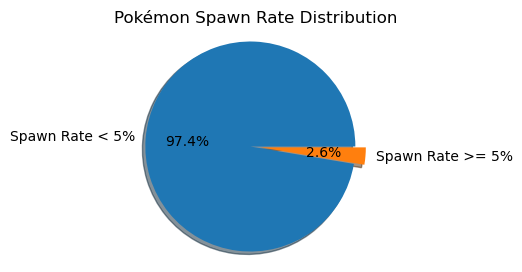

In [4]:
#Visuallization
count_less_than_5_percent = len(pokemon_less_than_5_percent)

# Calculate the count of Pokémon with a spawn rate greater than or equal to 5%
count_greater_than_5_percent = len(df) - count_less_than_5_percent

# Create a pie chart
labels = ['Spawn Rate < 5%', 'Spawn Rate >= 5%']
sizes = [count_less_than_5_percent, count_greater_than_5_percent]
explode = (0.1, 0)  # To highlight the 'Spawn Rate < 5%' slice
plt.figure(figsize=(3,3))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title('Pokémon Spawn Rate Distribution')
plt.show()

**2. Get all Pokemons that have less than 4 weaknesses**

In [5]:
import ast
df["weaknesses"] = df["weaknesses"].apply(lambda x : ast.literal_eval(x))
pokemon_less_than_4_weaknesses = df[df["weaknesses"].apply(lambda x : len(x)) < 4]["name"].tolist()
# Print the Pokémon with less than 4 weaknesses
for pokemon_name in pokemon_less_than_4_weaknesses:
    print(pokemon_name)

Charmander
Charmeleon
Charizard
Squirtle
Wartortle
Blastoise
Caterpie
Metapod
Pidgey
Pidgeotto
Pidgeot
Rattata
Raticate
Spearow
Fearow
Ekans
Arbok
Pikachu
Raichu
Sandshrew
Sandslash
Nidoran ♀ (Female)
Nidorina
Nidoran ♂ (Male)
Nidorino
Clefairy
Clefable
Vulpix
Ninetales
Jigglypuff
Wigglytuff
Diglett
Dugtrio
Meowth
Persian
Psyduck
Golduck
Mankey
Primeape
Growlithe
Arcanine
Poliwag
Poliwhirl
Abra
Kadabra
Alakazam
Machop
Machoke
Machamp
Tentacool
Tentacruel
Ponyta
Rapidash
Magnemite
Magneton
Farfetch'd
Doduo
Dodrio
Seel
Grimer
Muk
Shellder
Drowzee
Hypno
Krabby
Kingler
Voltorb
Electrode
Cubone
Marowak
Hitmonlee
Hitmonchan
Lickitung
Koffing
Weezing
Chansey
Kangaskhan
Horsea
Seadra
Goldeen
Seaking
Staryu
Mr. Mime
Electabuzz
Magmar
Pinsir
Tauros
Magikarp
Gyarados
Ditto
Eevee
Vaporeon
Jolteon
Flareon
Porygon
Snorlax
Zapdos
Moltres
Dratini
Dragonair
Mewtwo
Mew


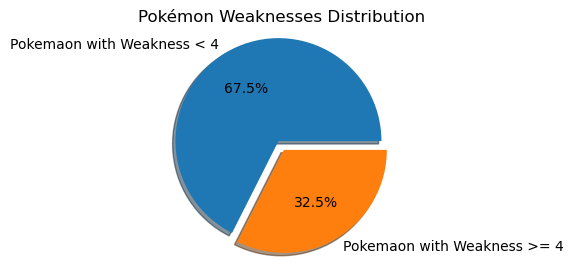

In [6]:
#Visuallization
count_pokemon_with_less_than_4_weaknesses = len(pokemon_less_than_4_weaknesses)

count_pokemon_with_4_weaknesses = len(df) - count_pokemon_with_less_than_4_weaknesses

# Create a pie chart
labels = ['Pokemaon with Weakness < 4', 'Pokemaon with Weakness >= 4']
sizes = [count_pokemon_with_less_than_4_weaknesses, count_pokemon_with_4_weaknesses]
explode = (0.1, 0)
plt.figure(figsize=(3,3))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title('Pokémon Weaknesses Distribution')
plt.show()

**3. Get all Pokemons that have no multipliers at all**

In [7]:
df[df['multipliers'].isna()]['name'].tolist()

['Venusaur',
 'Charizard',
 'Blastoise',
 'Butterfree',
 'Beedrill',
 'Pidgeot',
 'Raticate',
 'Fearow',
 'Arbok',
 'Raichu',
 'Sandslash',
 'Nidoqueen',
 'Nidoking',
 'Clefable',
 'Ninetales',
 'Wigglytuff',
 'Golbat',
 'Vileplume',
 'Parasect',
 'Venomoth',
 'Dugtrio',
 'Persian',
 'Golduck',
 'Primeape',
 'Arcanine',
 'Poliwrath',
 'Alakazam',
 'Machamp',
 'Victreebel',
 'Tentacruel',
 'Golem',
 'Rapidash',
 'Slowbro',
 'Magneton',
 "Farfetch'd",
 'Dodrio',
 'Dewgong',
 'Muk',
 'Cloyster',
 'Gengar',
 'Onix',
 'Hypno',
 'Kingler',
 'Electrode',
 'Exeggutor',
 'Marowak',
 'Hitmonlee',
 'Hitmonchan',
 'Lickitung',
 'Weezing',
 'Rhydon',
 'Chansey',
 'Tangela',
 'Kangaskhan',
 'Seadra',
 'Seaking',
 'Starmie',
 'Mr. Mime',
 'Scyther',
 'Jynx',
 'Electabuzz',
 'Magmar',
 'Pinsir',
 'Tauros',
 'Gyarados',
 'Lapras',
 'Ditto',
 'Vaporeon',
 'Jolteon',
 'Flareon',
 'Porygon',
 'Omastar',
 'Kabutops',
 'Aerodactyl',
 'Snorlax',
 'Articuno',
 'Zapdos',
 'Moltres',
 'Dragonite',
 'Mewtwo',
 '

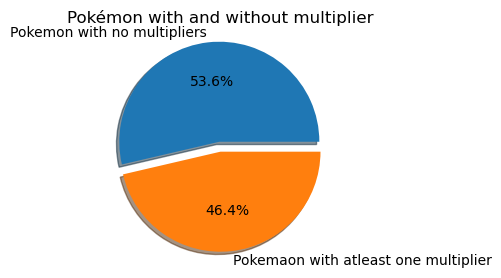

In [8]:
#Visuallization
count_pokemon_without_multipliers = len(df[df['multipliers'].isna()]['name'].tolist())

count_pokemon_with_multipliers = len(df) - count_pokemon_without_multipliers

# Create a pie chart
labels = ['Pokemon with no multipliers', 'Pokemaon with atleast one multiplier']
sizes = [count_pokemon_without_multipliers, count_pokemon_with_multipliers]
explode = (0.1, 0)
plt.figure(figsize=(3,3))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title('Pokémon with and without multiplier')
plt.show()

**4. Get all Pokemons that do not have more than 2 evolutions**

In [9]:
# Filter Pokémon with not more than 2 evolutions
pokemon_not_more_than_2_evolutions = df[df['next_evolution'].apply(lambda x: len(x) if isinstance(x, list) else 0) <= 2]

# Print the Pokémon with not more than 2 evolutions
for pokemon_name in pokemon_not_more_than_2_evolutions['name']:
    print(pokemon_name)

Bulbasaur
Ivysaur
Venusaur
Charmander
Charmeleon
Charizard
Squirtle
Wartortle
Blastoise
Caterpie
Metapod
Butterfree
Weedle
Kakuna
Beedrill
Pidgey
Pidgeotto
Pidgeot
Rattata
Raticate
Spearow
Fearow
Ekans
Arbok
Pikachu
Raichu
Sandshrew
Sandslash
Nidoran ♀ (Female)
Nidorina
Nidoqueen
Nidoran ♂ (Male)
Nidorino
Nidoking
Clefairy
Clefable
Vulpix
Ninetales
Jigglypuff
Wigglytuff
Zubat
Golbat
Oddish
Gloom
Vileplume
Paras
Parasect
Venonat
Venomoth
Diglett
Dugtrio
Meowth
Persian
Psyduck
Golduck
Mankey
Primeape
Growlithe
Arcanine
Poliwag
Poliwhirl
Poliwrath
Abra
Kadabra
Alakazam
Machop
Machoke
Machamp
Bellsprout
Weepinbell
Victreebel
Tentacool
Tentacruel
Geodude
Graveler
Golem
Ponyta
Rapidash
Slowpoke
Slowbro
Magnemite
Magneton
Farfetch'd
Doduo
Dodrio
Seel
Dewgong
Grimer
Muk
Shellder
Cloyster
Gastly
Haunter
Gengar
Onix
Drowzee
Hypno
Krabby
Kingler
Voltorb
Electrode
Exeggcute
Exeggutor
Cubone
Marowak
Hitmonlee
Hitmonchan
Lickitung
Koffing
Weezing
Rhyhorn
Rhydon
Chansey
Tangela
Kangaskhan
Horsea
Sead

**5. Get all Pokemons whose spawn time is less than 300 seconds. (Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.)**

In [10]:
#Convert spawn time to seconds
def convert_spawn_time_to_seconds(time):
    """Convets the time to the seconds and also handles null value"""
    try:
        minutes, seconds = map(int, time.split(':'))
        return minutes * 60 + seconds
    except (AttributeError, ValueError):
        return None

df['spawn_time_seconds'] = df['spawn_time'].apply(convert_spawn_time_to_seconds)

# Filter Pokémon with spawn time less than 300 seconds
pokemon_less_than_300s_spawn_time = df[df['spawn_time_seconds'] < 300]

# Print the Pokémon with spawn time less than 300 seconds
for pokemon_name in pokemon_less_than_300s_spawn_time['name']:
    print(pokemon_name)


Squirtle
Blastoise
Metapod
Weedle
Kakuna
Beedrill
Pidgey
Pidgeotto
Pidgeot
Rattata
Raticate
Fearow
Arbok
Pikachu
Sandshrew
Nidoran ♀ (Female)
Nidoran ♂ (Male)
Clefairy
Clefable
Ninetales
Golbat
Oddish
Paras
Parasect
Venonat
Diglett
Meowth
Persian
Psyduck
Growlithe
Arcanine
Poliwag
Poliwrath
Abra
Machop
Machamp
Bellsprout
Tentacool
Graveler
Ponyta
Rapidash
Slowbro
Magnemite
Farfetch'd
Dodrio
Muk
Cloyster
Gastly
Haunter
Gengar
Onix
Drowzee
Hypno
Krabby
Kingler
Voltorb
Electrode
Cubone
Marowak
Hitmonlee
Lickitung
Rhyhorn
Chansey
Kangaskhan
Horsea
Seadra
Goldeen
Mr. Mime
Electabuzz
Pinsir
Tauros
Gyarados
Jolteon
Porygon
Kabuto


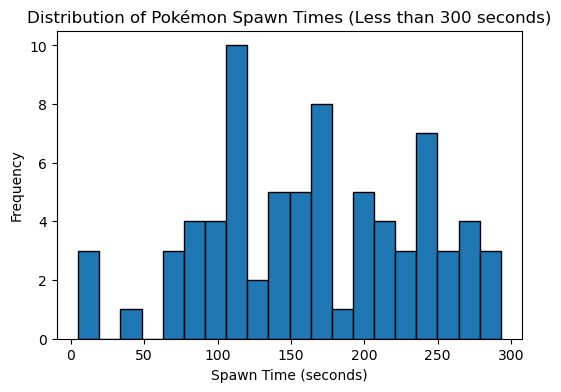

In [11]:
# Create a histogram of spawn times
plt.figure(figsize=(6, 4))
plt.hist(pokemon_less_than_300s_spawn_time['spawn_time_seconds'], bins=20, edgecolor='black')
plt.title('Distribution of Pokémon Spawn Times (Less than 300 seconds)')
plt.xlabel('Spawn Time (seconds)')
plt.ylabel('Frequency')
plt.show()

**6. Get all Pokemon who have more than two types of capabilities**

In [12]:
df1 = df.copy()
df1["type"] = df1["type"].apply(lambda x : ast.literal_eval(x))
df1[df1["type"].apply(lambda x : len(x) > 2)]["name"]

Series([], Name: name, dtype: object)

**There are no pokemon with more than two capabilities in the dataset**